In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load Dataset

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df.shape

(3786, 785)

In [4]:
test_df.shape

(3778, 785)

In [5]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.00000,3786.000000,3786.000000,...,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000
mean,4.450079,0.003698,0.006867,0.025357,0.105388,0.201532,0.440306,0.86635,2.367406,5.807713,...,34.907794,23.390489,16.507794,17.612946,22.931308,18.443593,9.123118,2.824042,0.687715,0.062880
std,2.870479,0.227530,0.200278,0.274676,1.982949,2.958508,6.164050,8.48675,14.835282,24.491381,...,57.863304,48.218190,41.803824,43.523365,51.796674,46.349720,30.868680,17.360291,7.999849,1.794035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,59.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,14.000000,10.000000,10.000000,87.000000,88.000000,205.000000,198.00000,216.000000,216.000000,...,248.000000,251.000000,251.000000,254.000000,247.000000,255.000000,234.000000,217.000000,199.000000,74.000000


In [6]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

#### Each row represents an grayscale image containing 784 pixels and each pixel having values in range from 0-255  
#### The column label is a discrete value in the range 0 to 9 each value representing a specific category

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess Data  
Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values.

In [8]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [9]:
y_train = train_df.iloc[:,0].to_numpy()

In [10]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [11]:
y_test = test_df.iloc[:,0].to_numpy()

### Visualization

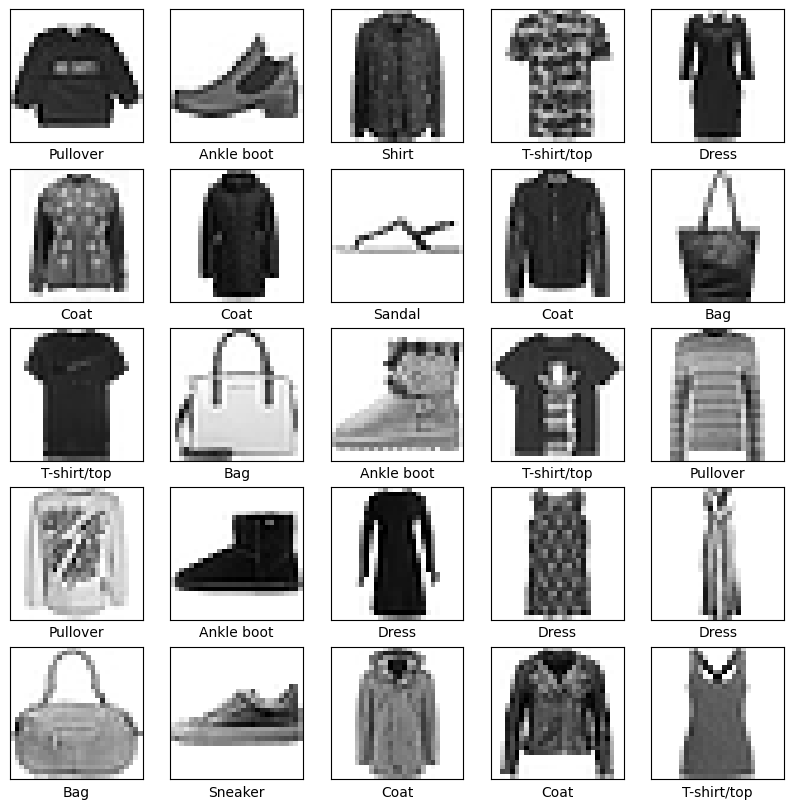

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Model Building

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [14]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [15]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
3/3 [==============================] - 3s 725ms/step - loss: 2.1930 - accuracy: 0.1888 - val_loss: nan - val_accuracy: 0.3947
Epoch 2/50
3/3 [==============================] - 2s 645ms/step - loss: 1.7170 - accuracy: 0.4911 - val_loss: nan - val_accuracy: 0.6947
Epoch 3/50
3/3 [==============================] - 2s 647ms/step - loss: 1.2950 - accuracy: 0.6457 - val_loss: nan - val_accuracy: 0.7474
Epoch 4/50
3/3 [==============================] - 2s 740ms/step - loss: 1.0169 - accuracy: 0.6863 - val_loss: nan - val_accuracy: 0.8053
Epoch 5/50
3/3 [==============================] - 3s 770ms/step - loss: 0.8452 - accuracy: 0.7316 - val_loss: nan - val_accuracy: 0.8421
Epoch 6/50
3/3 [==============================] - 2s 644ms/step - loss: 0.7613 - accuracy: 0.7461 - val_loss: nan - val_accuracy: 0.8158
Epoch 7/50
3/3 [==============================] - 2s 646ms/step - loss: 0.6983 - accuracy: 0.7567 - val_loss: nan - val_accuracy: 0.8421
Epoch 8/50
3/3 [=========================

### Evaluation

In [18]:
evaluation = model.evaluate(x_test,y_test)

119/119 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8523


In [19]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.8523027896881104


In [20]:
y_probas = model.predict(x_test)

119/119 [==============================] - 1s 4ms/step


In [21]:
y_pred = y_probas.argmax(axis=-1)

In [22]:
y_pred

array([0, 1, 2, ..., 6, 7, 0])

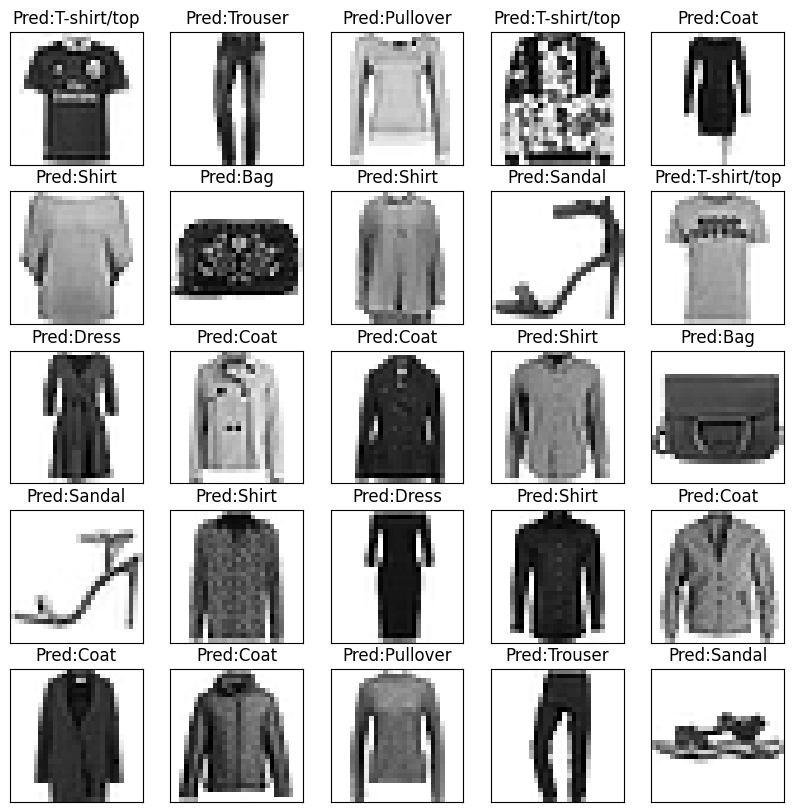

In [23]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [25]:
from sklearn.metrics import classification_report

In [26]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.76      0.80      0.78       367
     class 1       0.98      0.97      0.98       362
     class 2       0.81      0.71      0.76       369
     class 3       0.88      0.88      0.88       387
     class 4       0.77      0.84      0.80       378
     class 5       0.94      0.91      0.93       386
     class 6       0.65      0.63      0.64       402
     class 7       0.87      0.90      0.88       355
     class 8       0.96      0.95      0.95       385
     class 9       0.93      0.93      0.93       387

    accuracy                           0.85      3778
   macro avg       0.85      0.85      0.85      3778
weighted avg       0.85      0.85      0.85      3778

